In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os
from load_data import load_data

In [3]:
data = load_data("bianconi-barabasi_10000_5").fillna(method="ffill")

Loading dataset: Completed!


In [4]:
data = data.xs("D", axis=1, level="compartment")

In [5]:
data

run                                 0    1    2    3    4    5     6     7   \
reaction fear     feedback t                                                  
none     none     none     0.000   0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0   
                           0.125   0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0   
                           0.250   0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0   
                           0.375   0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0   
                           0.500   0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0   
...                                ...  ...  ...  ...  ...  ...   ...   ...   
cut      anticorr all      89.875  6.0  1.0  1.0  9.0  2.0  3.0  11.0  11.0   
                           90.000  6.0  1.0  1.0  9.0  2.0  3.0  11.0  11.0   
                           90.125  6.0  1.0  1.0  9.0  2.0  3.0  11.0  11.0   
                           90.250  6.0  1.0  1.0  9.0  2.0  3.0  11.0  11.0   
                           90.375  6.0  1.0  1.0  9.0  2.0  3.0  11.0  11.0   

run                                 8    9   ...   90   91   92   93   94  \
reaction fear     feedback t                 ...                            
none     none     none     0.000   0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0   
                           0.125   0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0   
                           0.250   0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0   
                           0.375   0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0   
                           0.500   0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0   
...                                ...  ...  ...  ...  ...  ...  ...  ...   
cut      anticorr all      89.875  2.0  5.0  ...  8.0  2.0  6.0  5.0  4.0   
                           90.000  2.0  5.0  ...  8.0  2.0  6.0  5.0  4.0   
                           90.125  2.0  5.0  ...  8.0  2.0  6.0  5.0  4.0   
                           90.250  2.0  5.0  ...  8.0  2.0  6.0  5.0  4.0   
                           90.375  2.0  5.0  ...  8.0  2.0  6.0  5.0  4.0   

run                                 95   96   97   98   99  
reaction fear     feedback t                                
none     none     none     0.000   0.0  0.0  0.0  0.0  0.0  
                           0.125   0.0  0.0  0.0  0.0  0.0  
                           0.250   0.0  0.0  0.0  0.0  0.0  
                           0.375   0.0  0.0  0.0  0.0  0.0  
                           0.500   0.0  0.0  0.0  0.0  0.0  
...                                ...  ...  ...  ...  ...  
cut      anticorr all      89.875  4.0  2.0  8.0  7.0  5.0  
                           90.000  4.0  2.0  8.0  7.0  5.0  
                           90.125  4.0  2.0  8.0  7.0  5.0  
                           90.250  4.0  2.0  8.0  7.0  5.0  
                           90.375  4.0  2.0  8.0  7.0  5.0  

[66363 rows x 100 columns]

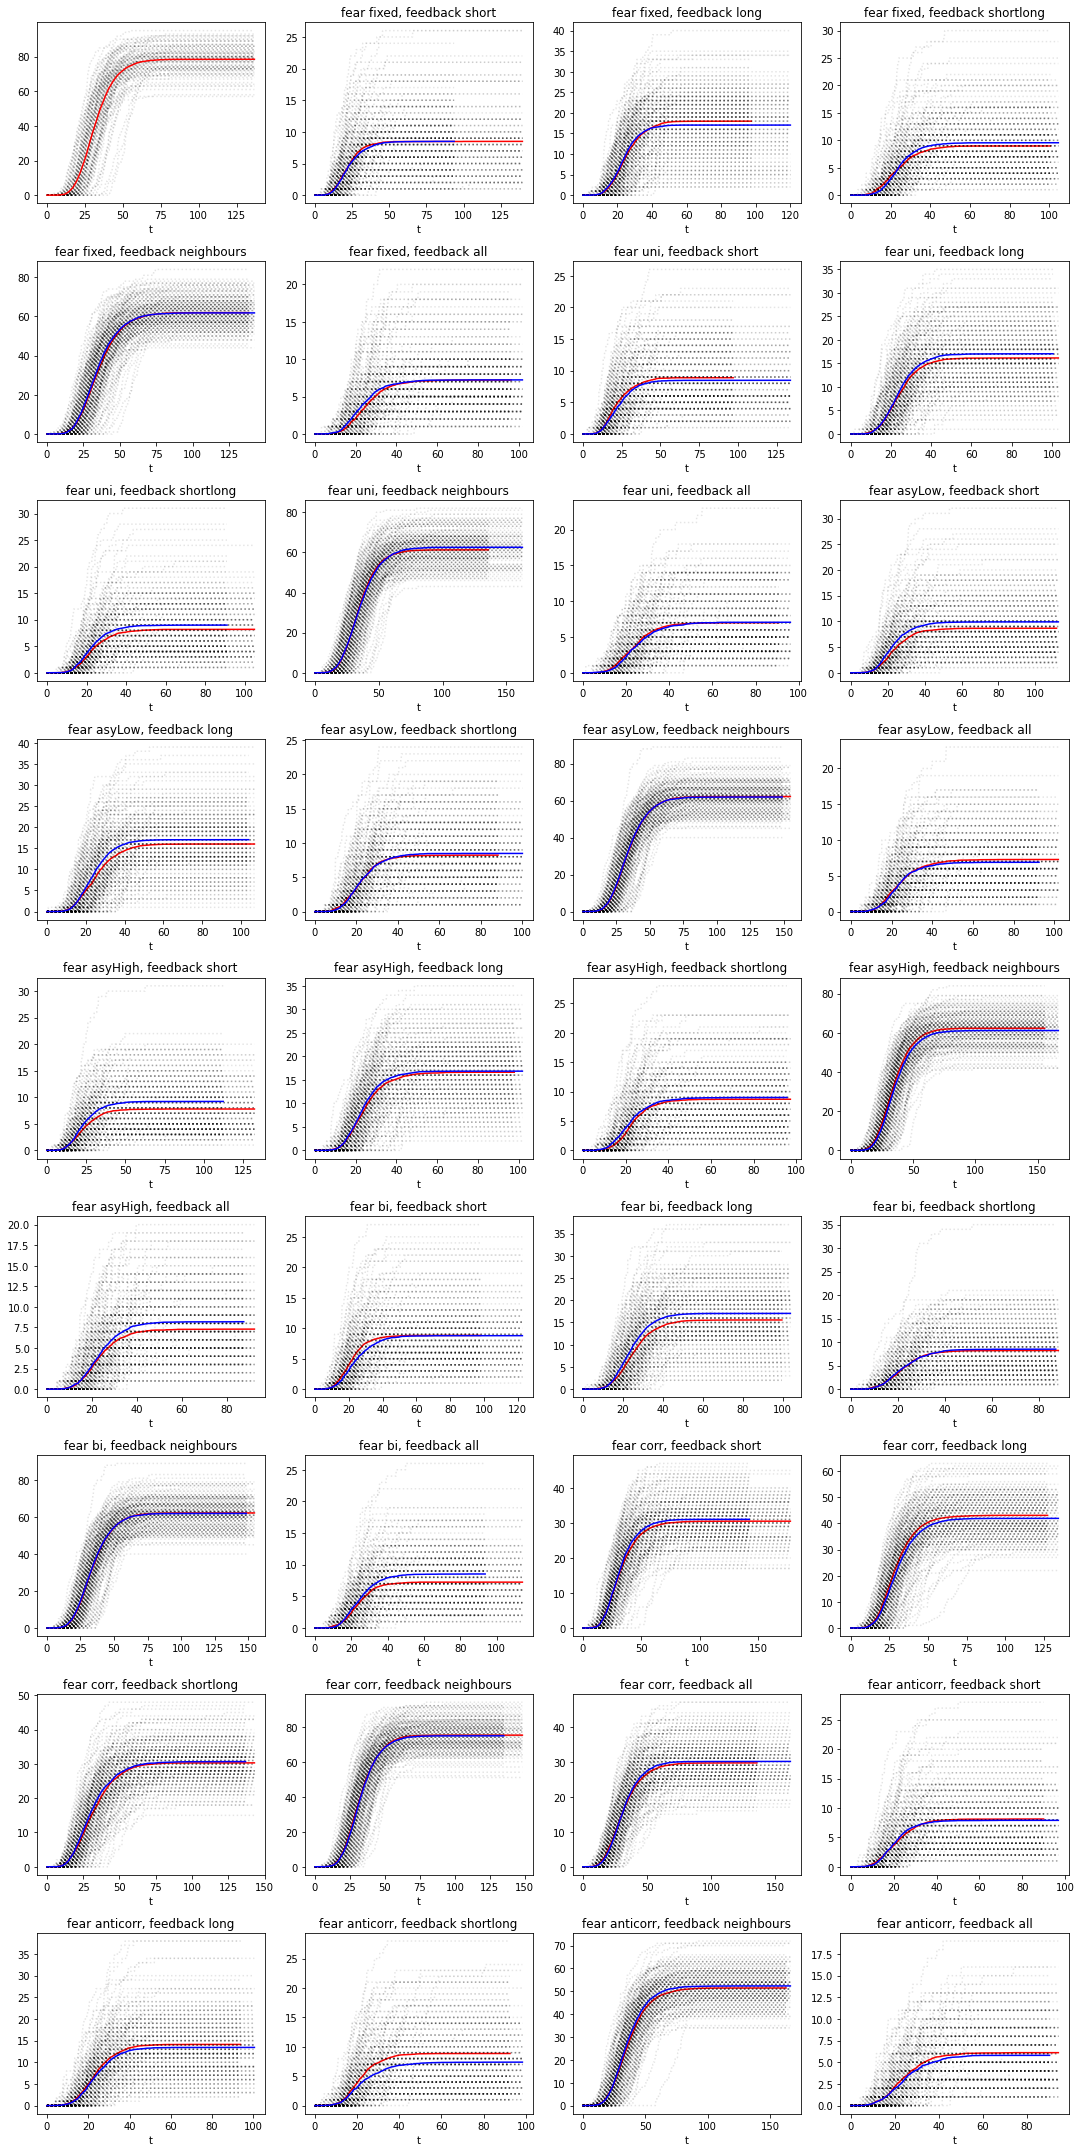

In [8]:
fig, axs = plt.subplots(9, 4, figsize=(15,30))
axs = axs.flatten()

i = 0
deaths = data.xs(("none","none","none"), level=(0,1,2))
deaths.plot(linestyle=":", color="k", alpha=0.1, legend=False, ax=axs[i])
deaths.mean(axis=1).plot(color="r", ax=axs[i])
i = 1
for hyper_pars in pd.unique(data.reset_index(["reaction","t"]).index):
    if hyper_pars[0] == "none":
        continue
    axs[i].set_title(f"fear {hyper_pars[0]}, feedback {hyper_pars[1]}")
    deaths = data.xs("soften", level=0).xs(hyper_pars, level=(0,1))
    deaths.plot(linestyle=":", color="k", alpha=0.1, legend=False, ax=axs[i])
    deaths.mean(axis=1).plot(color="r", label="soften", ax=axs[i])
    deaths = data.xs("cut", level=0).xs(hyper_pars, level=(0,1))
    deaths.plot(linestyle=":", color="k", alpha=0.1, legend=False, ax=axs[i])
    deaths.mean(axis=1).plot(color="b", label="cut", ax=axs[i])
    i = i + 1
fig.tight_layout()